In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn import metrics
import seaborn as sn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

Veride aslında eksiklik yoktur fakat evlerde bulunmayan öznitelikler Nan olarak kaydedilmiştir. Bu verilerin kolay işlenebilmesi adına "Nan" veriler "0" ile doldurulur.

In [2]:
df = pd.read_csv("/home/mete/Workspace/Okul/Ders/Bil479/Data/train.csv")
df_test = pd.read_csv("/home/mete/Workspace/Okul/Ders/Bil479/Data/test.csv") # hedef sütunu içermiyor
df_correct = pd.read_csv("/home/mete/Workspace/Okul/Ders/Bil479/Data/testtarget.csv")

In [3]:
df = df.fillna(0)
df_test = df_test.fillna(0)

Verinin coralasyon matrisi çıkartılır ve hedef (Satış fiyatı - SalePrice) ile ilişki oranı "0.2" den fazla olan
öznitelikler seçilir.

In [4]:
corr = df.corr()
high_correlated_columns = corr[abs(corr["SalePrice"])>0.2].index
high_correlated_columns = high_correlated_columns.drop("SalePrice")

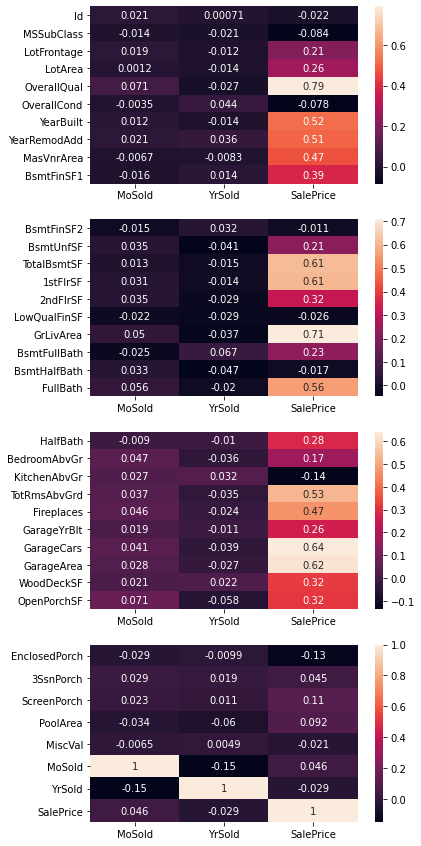

In [5]:
fig = plt.figure(figsize = (6,15))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sn.heatmap(corr.iloc[:10,35:38]  , annot=True, ax=ax1)
sn.heatmap(corr.iloc[10:20,35:38], annot=True, ax=ax2)
sn.heatmap(corr.iloc[20:30,35:38], annot=True, ax=ax3)
sn.heatmap(corr.iloc[30:38,35:38], annot=True, ax=ax4)

Hedef öznitelik veriden ayrıştırılır ve Y olarak saklanır. Geri kalan özniteikler "MinMaxScaler" kullanılarak
normalize edilir. Normalize edilmiş öznitelik değerleri X olarak saklanır.

In [6]:
x_train = df[high_correlated_columns].values
x_test = df_test[high_correlated_columns].values

In [7]:
y_test = df_correct["SalePrice"]
y_train = df["SalePrice"]

In [8]:
y_train_max = max(y_train.values)
y_train_min = min(y_train.values)
y_train = (y_train-y_train_min)/(y_train_max-y_train_min)

In [9]:
y_test_max = max(y_test.values)
y_test_min = min(y_test.values)
y_test = (y_test-y_test_min)/(y_test_max-y_test_min)

In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)

In [12]:
y_train = np.array([int((x/(np.std(y_train)*2))) for x in y_train])
y_test = np.array([int((x/(np.std(y_test)*2))) for x in y_test])

In [13]:
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)

In [15]:
#Training Data

In [44]:
y_pred = gnb.predict(x_train)

In [46]:
conf_matrix = confusion_matrix(y_train,y_pred)
print(conf_matrix)
print("Total Accuracy---------------------------------")



conf_vals = []
for i in range(conf_matrix.shape[0]):
    TP = conf_matrix[i,i]
    FP = conf_matrix[i,:].sum() - TP
    FN = conf_matrix[:,i].sum() - TP
    TN = conf_matrix.sum() - (TP + FP + FN)
    conf_vals.append([TP,FP,FN,TN])
conf_vals = np.array(conf_vals)

# Total Accuracy = (TP + TN)/(TP + TN + FP + FN)
acc = (y_train == y_pred).sum()/y_train.shape[0]
print(f"Accuracy:{acc}")
print("Accuracy---------------------------------")





# Accuracy = (TP + TN)/(TP + TN + FP + FN)
for i in range(conf_matrix.shape[0]):
    s = (conf_vals[i,0] + conf_vals[i,3]) / conf_vals[i,:].sum()
    print(f"Sınıf{i} = {s}")
    
    
    
    


print("Sensitivity------------------------------------")
# Sensitivity = TP / TP + FN
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,0] / (conf_vals[i,0] + conf_vals[i,2])
    if not (np.isnan(s)):
        sm += s
        
    print(f"Sınıf{i} = TP({conf_vals[i,0]}) / (TP({conf_vals[i,0]}) + FN({conf_vals[i,2]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}")   






print("Specificity-----------------------------------")
# Specificity = TN / TN + FP
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,3] / (conf_vals[i,3] + conf_vals[i,1])
    if not (np.isnan(s)):
        sm += s
    print(f"Sınıf{i} = TN({conf_vals[i,3]}) / (TN({conf_vals[i,3]})+FP({conf_vals[i,1]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}") 




print("Precision-----------------------------------")
##### Precision = TP / TP + FP
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,0] / (conf_vals[i,0] + conf_vals[i,1])
    if not (np.isnan(s)):
        sm += s
    print(f"Sınıf{i} = TP({conf_vals[i,0]}) / (TP({conf_vals[i,0]}) + FP({conf_vals[i,1]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}") 

[[837 154   2   1   0]
 [ 27 323  45  17   0]
 [  0   3  22  21   0]
 [  0   0   0   6   0]
 [  0   0   0   0   2]]
Total Accuracy---------------------------------
Accuracy:0.815068493150685
Accuracy---------------------------------
Sınıf0 = 0.873972602739726
Sınıf1 = 0.8315068493150685
Sınıf2 = 0.9513698630136986
Sınıf3 = 0.9732876712328767
Sınıf4 = 1.0
Sensitivity------------------------------------
Sınıf0 = TP(837) / (TP(837) + FN(27)) = 0.96875
Sınıf1 = TP(323) / (TP(323) + FN(157)) = 0.6729166666666667
Sınıf2 = TP(22) / (TP(22) + FN(47)) = 0.3188405797101449
Sınıf3 = TP(6) / (TP(6) + FN(39)) = 0.13333333333333333
Sınıf4 = TP(2) / (TP(2) + FN(0)) = 1.0
avg = 0.618768115942029
Specificity-----------------------------------
Sınıf0 = TN(439) / (TN(439)+FP(157)) = 0.7365771812080537
Sınıf1 = TN(891) / (TN(891)+FP(89)) = 0.9091836734693878
Sınıf2 = TN(1367) / (TN(1367)+FP(24)) = 0.98274622573688
Sınıf3 = TN(1415) / (TN(1415)+FP(0)) = 1.0
Sınıf4 = TN(1458) / (TN(1458)+FP(0)) = 1.0
avg = 

In [18]:
#Test Data

In [41]:
y_pred = gnb.predict(x_test)

In [43]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print("Total Accuracy---------------------------------")



conf_vals = []
for i in range(conf_matrix.shape[0]):
    TP = conf_matrix[i,i]
    FP = conf_matrix[i,:].sum() - TP
    FN = conf_matrix[:,i].sum() - TP
    TN = conf_matrix.sum() - (TP + FP + FN)
    conf_vals.append([TP,FP,FN,TN])
conf_vals = np.array(conf_vals)

# Total Accuracy = (TP + TN)/(TP + TN + FP + FN)
acc = (y_test == y_pred).sum()/y_test.shape[0]
print(f"Accuracy:{acc}")
print("Accuracy---------------------------------")





# Accuracy = (TP + TN)/(TP + TN + FP + FN)
for i in range(conf_matrix.shape[0]):
    s = (conf_vals[i,0] + conf_vals[i,3]) / conf_vals[i,:].sum()
    print(f"Sınıf{i} = {s}")
    
    
    
    


print("Sensitivity------------------------------------")
# Sensitivity = TP / TP + FN
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,0] / (conf_vals[i,0] + conf_vals[i,2])
    if not (np.isnan(s)):
        sm += s
        
    print(f"Sınıf{i} = TP({conf_vals[i,0]}) / (TP({conf_vals[i,0]}) + FN({conf_vals[i,2]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}")   






print("Specificity-----------------------------------")
# Specificity = TN / TN + FP
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,3] / (conf_vals[i,3] + conf_vals[i,1])
    if not (np.isnan(s)):
        sm += s
    print(f"Sınıf{i} = TN({conf_vals[i,3]}) / (TN({conf_vals[i,3]})+FP({conf_vals[i,1]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}") 




print("Precision-----------------------------------")
##### Precision = TP / TP + FP
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,0] / (conf_vals[i,0] + conf_vals[i,1])
    if not (np.isnan(s)):
        sm += s
    print(f"Sınıf{i} = TP({conf_vals[i,0]}) / (TP({conf_vals[i,0]}) + FP({conf_vals[i,1]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}") 

[[626 226   0   0]
 [ 28 500   1   0]
 [  0  69   0   0]
 [  0   8   1   0]]
Total Accuracy---------------------------------
Accuracy:0.7717614804660726
Accuracy---------------------------------
Sınıf0 = 0.8259081562714188
Sınıf1 = 0.772446881425634
Sınıf2 = 0.9513365318711446
Sınıf3 = 0.9938313913639479
Sensitivity------------------------------------
Sınıf0 = TP(626) / (TP(626) + FN(28)) = 0.9571865443425076
Sınıf1 = TP(500) / (TP(500) + FN(303)) = 0.6226650062266501
Sınıf2 = TP(0) / (TP(0) + FN(2)) = 0.0
Sınıf3 = TP(0) / (TP(0) + FN(0)) = nan
avg = 0.39496288764228943
Specificity-----------------------------------
Sınıf0 = TN(579) / (TN(579)+FP(226)) = 0.7192546583850932
Sınıf1 = TN(627) / (TN(627)+FP(29)) = 0.9557926829268293
Sınıf2 = TN(1388) / (TN(1388)+FP(69)) = 0.9526424159231297
Sınıf3 = TN(1450) / (TN(1450)+FP(9)) = 0.9938313913639479
avg = 0.90538028714975
Precision-----------------------------------
Sınıf0 = TP(626) / (TP(626) + FP(226)) = 0.7347417840375586
Sınıf1 = TP(500)

/home/mete/Workspace/Okul/main_env/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in long_scalars
